In [5]:
import numpy as np
import pandas as pd

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
a = 4
np.asarray(a)

array(4)

In [134]:
df = pd.read_csv("results/2022_01_10_aggregate.csv")
# df = df.groupby("midlat_deg").mean()
del df["midlat_deg"]
df.head()

,midlat_deg.1,nflares,ed_rec_mean,ed_rec_median,ed_rec_std,ed_rec_min,ed_rec_max,diff_ed_rec_mean_stepsize1,diff_ed_rec_median_stepsize1,diff_ed_rec_std_stepsize1,...,diff_amp_over_ed_rec_mean_stepsize2,diff_amp_over_ed_rec_median_stepsize2,diff_amp_over_ed_rec_std_stepsize2,diff_amp_over_ed_rec_min_stepsize2,diff_amp_over_ed_rec_max_stepsize2,diff_amp_over_ed_rec_mean_stepsize3,diff_amp_over_ed_rec_median_stepsize3,diff_amp_over_ed_rec_std_stepsize3,diff_amp_over_ed_rec_min_stepsize3,diff_amp_over_ed_rec_max_stepsize3
0,0.095595,8.146893,0.000018,6.241576e-07,0.000045,1.045664e-07,0.000113,-1.602682e-05,1.235303e-08,0.000063,...,0.000006,2.387298e-05,0.000568,-0.000730,0.000719,0.000010,0.000024,0.000574,-0.000680,0.000656
1,0.275712,7.882653,0.000009,6.753805e-07,0.000026,1.327221e-07,0.000079,1.144682e-06,1.274252e-07,0.000042,...,-0.000003,6.575006e-07,0.000561,-0.000697,0.000671,0.000030,0.000013,0.000553,-0.000608,0.000673
2,0.456184,8.174863,0.000006,6.670946e-07,0.000017,1.941016e-07,0.000051,-2.959268e-07,-2.292628e-07,0.000027,...,-0.000002,-9.835221e-06,0.000546,-0.000677,0.000671,0.000013,0.000026,0.000530,-0.000622,0.000617
3,0.641202,8.059701,0.000009,7.345617e-07,0.000027,1.335658e-07,0.000089,1.149207e-06,9.070888e-07,0.000043,...,-0.000006,2.172339e-05,0.000579,-0.000729,0.000677,0.000006,0.000017,0.000561,-0.000675,0.000673
4,0.815364,8.990148,0.000059,6.358832e-07,0.000202,1.007228e-07,0.000651,-2.001161e-07,-2.590978e-08,0.000328,...,-0.000021,-3.182196e-05,0.000558,-0.000737,0.000688,-0.000008,0.000004,0.000539,-0.000679,0.000653


In [135]:
colids = np.where([("over" in x) & (("std" in x) | ("diff" in x))for x in  df.columns.values])[0]
columns = df.columns.values[colids]
columns

array(['dur_over_amp_std', 'diff_dur_over_amp_mean_stepsize1',
       'diff_dur_over_amp_median_stepsize1',
       'diff_dur_over_amp_std_stepsize1',
       'diff_dur_over_amp_min_stepsize1',
       'diff_dur_over_amp_max_stepsize1',
       'diff_dur_over_amp_mean_stepsize2',
       'diff_dur_over_amp_median_stepsize2',
       'diff_dur_over_amp_std_stepsize2',
       'diff_dur_over_amp_min_stepsize2',
       'diff_dur_over_amp_max_stepsize2',
       'diff_dur_over_amp_mean_stepsize3',
       'diff_dur_over_amp_median_stepsize3',
       'diff_dur_over_amp_std_stepsize3',
       'diff_dur_over_amp_min_stepsize3',
       'diff_dur_over_amp_max_stepsize3', 'dur_over_ed_rec_std',
       'diff_dur_over_ed_rec_mean_stepsize1',
       'diff_dur_over_ed_rec_median_stepsize1',
       'diff_dur_over_ed_rec_std_stepsize1',
       'diff_dur_over_ed_rec_min_stepsize1',
       'diff_dur_over_ed_rec_max_stepsize1',
       'diff_dur_over_ed_rec_mean_stepsize2',
       'diff_dur_over_ed_rec_median_step

In [136]:
df = df.fillna(-999)

In [137]:
x = df[columns].values 
x.shape

(496, 48)

In [138]:
y = df["midlat_deg.1"].values

In [139]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [140]:
# read validation data
valid = pd.read_csv("results/2022_01_07_aggregate_validate.csv")

In [141]:
valid = valid.fillna(-999)

# del valid["inclination_deg"]
# del valid["nflares"]
# valid = valid.groupby("midlat_deg").mean()
# del valid["midlat_deg"]
validx = valid[columns].values 
validy = valid['midlat_deg.1'].values
validx.shape

(48, 48)

In [142]:
predictions = regressor.predict(validx)

In [143]:
errors = predictions - validy

Text(0, 0.5, 'prediction')

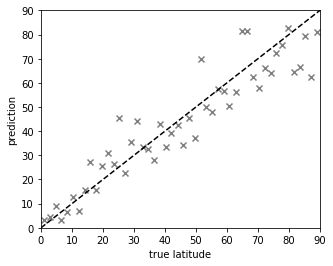

In [144]:
plt.figure(figsize=(5,4))
plt.scatter(validy, predictions, marker="x",c="grey")
plt.plot([0,90],[0,90],c="k",linestyle="dashed")
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel("true latitude")
plt.ylabel("prediction")

In [145]:
valid.columns

Index(['midlat_deg', 'midlat_deg.1', 'nflares', 'ed_rec_mean', 'ed_rec_median',
       'ed_rec_std', 'ed_rec_min', 'ed_rec_max', 'diff_ed_rec_mean_stepsize1',
       'diff_ed_rec_median_stepsize1',
       ...
       'diff_amp_over_ed_rec_mean_stepsize2',
       'diff_amp_over_ed_rec_median_stepsize2',
       'diff_amp_over_ed_rec_std_stepsize2',
       'diff_amp_over_ed_rec_min_stepsize2',
       'diff_amp_over_ed_rec_max_stepsize2',
       'diff_amp_over_ed_rec_mean_stepsize3',
       'diff_amp_over_ed_rec_median_stepsize3',
       'diff_amp_over_ed_rec_std_stepsize3',
       'diff_amp_over_ed_rec_min_stepsize3',
       'diff_amp_over_ed_rec_max_stepsize3'],
      dtype='object', length=123)

In [146]:
feature_list = list(valid[columns].columns.values)

In [147]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: diff_dur_over_ed_rec_min_stepsize2 Importance: 0.19
Variable: diff_amp_over_ed_rec_max_stepsize3 Importance: 0.16
Variable: diff_dur_over_ed_rec_max_stepsize3 Importance: 0.14
Variable: diff_amp_over_ed_rec_min_stepsize2 Importance: 0.11
Variable: diff_dur_over_amp_std_stepsize3 Importance: 0.06
Variable: dur_over_amp_std     Importance: 0.05
Variable: diff_dur_over_ed_rec_max_stepsize2 Importance: 0.04
Variable: diff_amp_over_ed_rec_min_stepsize3 Importance: 0.04
Variable: diff_dur_over_ed_rec_min_stepsize3 Importance: 0.03
Variable: diff_dur_over_ed_rec_min_stepsize1 Importance: 0.02
Variable: diff_dur_over_ed_rec_max_stepsize1 Importance: 0.02
Variable: diff_amp_over_ed_rec_max_stepsize1 Importance: 0.02
Variable: diff_amp_over_ed_rec_max_stepsize2 Importance: 0.02
Variable: diff_dur_over_amp_std_stepsize2 Importance: 0.01
Variable: diff_amp_over_ed_rec_min_stepsize1 Importance: 0.01
Variable: diff_dur_over_amp_mean_stepsize1 Importance: 0.0
Variable: diff_dur_over_amp_med

In [1]:
import dask